# **PROJET MACHINE LEARNING**




---
##**Membres de l'équipe**
*    DAI Elodie

*    ZHAO Julien

*    ZHAO Wenbo

*    CHENG Wenxin

*    BENKHANOUS Salaheddine

---
##**Modalités**
####**Deadline**
*   Maximum avant le 19 janvier 2025 à 20h.

---
####**Notation**
*   Un point pour la qualité de l'argumentation.
*   Un point pour la rigueur méthodologique.
*   Un point pour la performance si la RMSE finale obtenu est inférieure à 1.5 pour un dataset de test composée des 20% date les plus récentes.

---
####**Description du Dataset**

*  Le dataset représente les données de marché pour l'indice VKOSPI, qui est l'équivalent coréen de l'indice de volatilité implicite VIX aux États-Unis. Chaque ligne du dataset correspond à un jour de trading, excluant les week-ends et les jours fériés. Les colonnes du dataset fournissent diverses informations sur les transactions et les positions des options et des futures sur l'indice KOSPI200, qui est l'actif sous-jacent du VKOSPI.

---
###**Description des Colonnes**
*   Date : *La date du jour de trading.*
*   VKOSPI : *La valeur de l'indice de volatilité implicite VKOSPI pour ce jour.*
*   KOSPI200 : *La valeur de l'indice KOSPI200 pour ce jour.*
*   Open_interest : *Le nombre total de contrats d'options ouverts (non réglés) pour ce jour.*
*   For_KOSPI_Netbuying_Amount : *Le montant net acheté par les étrangers pour l'indice KOSPI200, calculé comme (Prix) * (Quantité).*
*   For_Future_Netbuying_Quantity : *La quantité nette achetée par les étrangers pour les futures de KOSPI200.*
*   For_Call_Netbuying_Quantity : *La quantité nette achetée par les étrangers pour les options d'achat (call) de KOSPI200.*
*   For_Put_Netbuying_Quantity : *La quantité nette achetée par les étrangers pour les options de vente (put) de KOSPI200.*
*   Indiv_Future_Netbuying_Quantity : *La quantité nette achetée par les individus pour les futures de KOSPI200.*
*   Indiv_Call_Netbuying_Quantity : *La quantité nette achetée par les individus pour les options d'achat (call) de KOSPI200.*
*   Indiv_Put_Netbuying_Quantity : *La quantité nette achetée par les individus pour les options de vente (put) de KOSPI200.*
*   PCRatio : *Le ratio Put-Call, qui est le rapport entre le volume des options de vente (put) et le volume des options d'achat (call).*
*   Day_till_expiration : *Le nombre de jours restants jusqu'à la date d'expiration des options.*

---
###**Notions financières**
*   Le KOSPI200 est un indice boursier composé des 200 plus grandes entreprises cotées en Corée du Sud. Il est souvent considéré comme un indicateur de la performance du marché boursier coréen. Un indice similaire au S&P500 pour les États-Unis, l’Euro STOXX 50 l’Europe ou le Nikkei 225 pour le Japon.
*   La volatilité implicite est une mesure de la volatilité future attendue d'un actif sous-jacent, dérivée des prix des options. Le VKOSPI est l'indice de volatilité implicite pour le marché coréen, comparable au VIX pour le marché américain, VSTOXX pour le marché européen ou VNKY pour le Japon.
*   L'open interest représente le nombre total de contrats d'options ouverts (non réglés) à une date donnée. C'est une mesure de l'activité de trading et de l'intérêt des investisseurs pour les options.
*   Le net buying amount ou quantity représente la différence entre les achats et les ventes effectués par un groupe spécifique (étrangers ou individus) pour un actif donné (KOSPI200, futures, options d'achat, options de vente). Un net buying positif indique que les achats dépassent les ventes.
*   Le ratio Put-Call est le rapport entre le volume des options de vente (put) et le volume des options d'achat (call). Il est utilisé comme indicateur de sentiment de marché. Un ratio élevé peut indiquer une prudence ou une anticipation de baisse des prix.
*   Une option d'achat (call) donne à son détenteur le droit, mais non l'obligation, d'acheter un actif sous-jacent à un prix prédéterminé (prix d'exercice) avant une date d'expiration donnée.
*   Une option de vente (put) donne à son détenteur le droit, mais non l'obligation, de vendre un actif sous-jacent à un prix prédéterminé (prix d'exercice) avant une date d'expiration donnée.
*   Un contrat à terme (future) est un accord pour acheter ou vendre un actif sous-jacent à un prix prédéterminé à une date future spécifiée.

---
###**Objectif**
*  Prédire, en expliquant rigoureusement et clairement la démarche, la valeur du VKOSPI. La métrique de référence sera la RSME, mais à des fins d'analyse d'autres métrique peuvent être discutée. Aucun algorithmes autres que ceux vus en cours et décrit dans le poly ne seront acceptés.

Dans cette étude, nous cherchons à prédire les données de marché relatives à l’indice VKOSPI, ce qui nous place dans un cadre d’apprentissage supervisé.
L’objectif principal est de prévoir une valeur continue (l’indice), ce qui relève naturellement d’une problématique de régression.
Cependant, il peut également être intéressant, à titre purement exploratoire et non exigé dans l’analyse, d’utiliser une approche de classification pour examiner les variations,
c’est-à-dire les hausses et baisses de cet indice.

---
# Présentation de quel cadre nous somme
> Apprentissage supevisé
> Valeur Continue donc sous catégorie régression

#**1. Importation des différents modules et données**


Dépôt du fichier dans le dossier : sample_date

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

data = pd.read_csv("./sample_data/options_KR.csv")
data.head()

,Date,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week
0,2009-06-02,33.45,180.90,4377777,4.940000e+11,-4953,-24646,6581,1228,-466,31336,0.94,7,Tue
1,2009-06-03,32.66,180.47,4562690,-8.997074e+10,47,-57128,46851,399,127709,-22259,0.93,6,Wed
2,2009-06-04,32.56,180.31,4827524,-1.090000e+11,-7666,-2000,48883,5744,262558,10367,0.87,5,Thu
3,2009-06-05,32.95,175.75,5022921,9.842024e+10,969,64792,27196,-1688,79789,113935,0.89,4,Fri
4,2009-06-08,30.41,177.77,5293996,4.329179e+10,5797,10995,23123,-5534,97154,146244,0.81,3,Mon


#**2. Contrôle des données du DataFrame**

###**2.1 Type de données**

On va dans un premier temps voir à quels types de données correspondent chacune des colonnes


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2580 non-null   object 
 1   VKOSPI                           2580 non-null   float64
 2   KOSPI200                         2580 non-null   float64
 3   Open_interest                    2580 non-null   int64  
 4   For_KOSPI_Netbuying_Amount       2580 non-null   float64
 5   For_Future_Netbuying_Quantity    2580 non-null   int64  
 6   For_Call_Netbuying_Quantity      2580 non-null   int64  
 7   For_Put_Netbuying_Quantity       2580 non-null   int64  
 8   Indiv_Future_Netbuying_Quantity  2580 non-null   int64  
 9   Indiv_Call_Netbuying_Quantity    2580 non-null   int64  
 10  Indiv_Put_Netbuying_Quantity     2580 non-null   int64  
 11  PCRatio                          2580 non-null   float64
 12  Day_till_expiration 

**/!\ Remarque /!\**

Ici, on remarque que les colonnes ci-dessous sont de types "object":
-  Date
-  Day_of_a_week

Afin de pouvoir les utiliser par la suite nous allons modifier leur type.

Premièrement on va convertir la colonne "Date" en type datetime

In [143]:
data['Date'] = pd.to_datetime(data['Date'])

Pour la colonne 'Day_of_a_week', nous allons d'abord examiner les différentes valeurs qu'elle contient.

In [144]:
unique_days = data['Day_of_a_week'].unique()
print(unique_days)

['Tue' 'Wed' 'Thu' 'Fri' 'Mon']


Nous constatons qu'elle comporte 5 valeurs distinctes. Nous allons ensuite associer à chaque valeur un numéro représentant chaque jour de la semaine.

In [145]:
day_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5}
data['Day_of_a_week'] = data['Day_of_a_week'].map(day_mapping)
print(data['Day_of_a_week'].unique())
data.head()


[2 3 4 5 1]


,Date,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week
0,2009-06-02,33.45,180.90,4377777,4.940000e+11,-4953,-24646,6581,1228,-466,31336,0.94,7,2
1,2009-06-03,32.66,180.47,4562690,-8.997074e+10,47,-57128,46851,399,127709,-22259,0.93,6,3
2,2009-06-04,32.56,180.31,4827524,-1.090000e+11,-7666,-2000,48883,5744,262558,10367,0.87,5,4
3,2009-06-05,32.95,175.75,5022921,9.842024e+10,969,64792,27196,-1688,79789,113935,0.89,4,5
4,2009-06-08,30.41,177.77,5293996,4.329179e+10,5797,10995,23123,-5534,97154,146244,0.81,3,1


Nous vérifions à nouveau si les types de données ont bien été mis à jour.

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2580 non-null   datetime64[ns]
 1   VKOSPI                           2580 non-null   float64       
 2   KOSPI200                         2580 non-null   float64       
 3   Open_interest                    2580 non-null   int64         
 4   For_KOSPI_Netbuying_Amount       2580 non-null   float64       
 5   For_Future_Netbuying_Quantity    2580 non-null   int64         
 6   For_Call_Netbuying_Quantity      2580 non-null   int64         
 7   For_Put_Netbuying_Quantity       2580 non-null   int64         
 8   Indiv_Future_Netbuying_Quantity  2580 non-null   int64         
 9   Indiv_Call_Netbuying_Quantity    2580 non-null   int64         
 10  Indiv_Put_Netbuying_Quantity     2580 non-null   int64      

**[OK]** Les types de données ont été correctement modifié, nous pouvons passer à la prochaine vérification.

###**2.2 Valeurs manquantes**

Pour avoir des données exhaustives, nous vérifions si il existe des valeurs null pour chaque colonne du DataFrame

In [147]:
missing_values = data.isnull().sum()
print(missing_values)

Date                               0
VKOSPI                             0
KOSPI200                           0
Open_interest                      0
For_KOSPI_Netbuying_Amount         0
For_Future_Netbuying_Quantity      0
For_Call_Netbuying_Quantity        0
For_Put_Netbuying_Quantity         0
Indiv_Future_Netbuying_Quantity    0
Indiv_Call_Netbuying_Quantity      0
Indiv_Put_Netbuying_Quantity       0
PCRatio                            0
Day_till_expiration                0
Day_of_a_week                      0
dtype: int64


**[OK]** Aucune valeur null est présente dans les données, nous pouvons passer à la prochaine vérification.

###**2.3 Qualité des données et exploration**

Désormais, nous souhaitons voir la répartition des données dans le dataset afin de s'assurer que les données présentes soient saine et savoir l'importances de chaque variable. Si des données sont abérantes, nous les retirerons.

Ici, nous nous concentrerons sur les données numériques et nous ferons abstraction des données catégorielles liées à la date.

####**2.3.1 Etude statistiques des données**

In [148]:
data.describe()

,Date,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week
count,2580,2580.000000,2580.000000,2.580000e+03,2.580000e+03,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,2014-08-09 04:11:43.255813888,16.744302,259.246508,2.303927e+06,2.889290e+10,10.226744,2727.117829,14117.202326,4.820930,16000.406589,6695.945736,0.954837,9.982946,3.000388
min,2009-06-02 00:00:00,9.720000,174.320000,2.242960e+05,-1.310000e+12,-20745.000000,-174455.000000,-183760.000000,-11879.000000,-179929.000000,-151533.000000,0.280000,0.000000,1.000000
25%,2011-12-25 06:00:00,13.087500,243.750000,1.013118e+06,-1.130000e+11,-2164.750000,-2863.250000,1836.000000,-1209.500000,-2574.000000,-13051.250000,0.850000,5.000000,2.000000
50%,2014-08-04 12:00:00,15.305000,257.310000,1.879194e+06,2.221070e+10,31.000000,1780.000000,9257.500000,-13.000000,4984.000000,-2065.500000,0.950000,10.000000,3.000000
75%,2017-03-17 18:00:00,18.772500,271.570000,3.236718e+06,1.670000e+11,2221.500000,7435.250000,23097.500000,1213.500000,17872.250000,9729.000000,1.050000,15.000000,4.000000
max,2019-11-07 00:00:00,50.110000,338.830000,9.134484e+06,1.720000e+12,20265.000000,152445.000000,228939.000000,10325.000000,908263.000000,919563.000000,1.790000,26.000000,5.000000
std,NaN,5.327865,29.034358,1.578398e+06,2.560887e+11,3953.221118,19549.308255,25202.453076,2126.388898,53037.030365,59832.131764,0.170583,6.293434,1.413254


On commence par regarder ce que l'on veut prédire :"VKOSPI".

**/!\Observation/!\**

On note un grand écart de valeur entre le 3ème quantile et le maximum. Cette différence pourrait engendrer une grande variance dans les performances du modèles en validation croisée. La présence de ces données pourraient impactées la performance du modèle.

Ensuite nous allons nous concentrer sur les différentes variables explicatives du dataset.


**/!\Observation/!\**

Pour les colonnes suivantes :
For_Future_Netbuying_Quantity	For_Call_Netbuying_Quantity	For_Put_Netbuying_Quantity	Indiv_Future_Netbuying_Quantity	Indiv_Call_Netbuying_Quantity	Indiv_Put_Netbuying_Quantity


On remarque la présence d'écart énorme, pour chacun, entre <minimum - quantile 1> et <quantile 3 - maximum>.
Cela peut être causé par des données qui ne suivent pas la tendances.

####**2.3.2 Exploration graphique des données**

Nous allons pour chacune des variables ci-dessous vérifier, la répartition des données :
- KOSPI200
- Open_interest
- For_KOSPI_Netbuying_Amount
- For_Future_Netbuying_Quantity
- For_Call_Netbuying_Quantity
- For_Put_Netbuying_Quantity
- Indiv_Future_Netbuying_Quantity
- Indiv_Call_Netbuying_Quantity
- Indiv_Put_Netbuying_Quantity
- PCRatio


Si des données ne suivent pas la tendance, nous les supprimeron dans ce cas là.

Gardons la taille initiale du dataset, afin de pouvoir comparer combien de données auront été supprimé à la fin.

In [149]:
initial_size = data.shape[0]
print(initial_size)

2580


#####**Fonction explore**

On va vérifier la répartitions des données pour chaque variable explicatif ainsi que la distribution des variables explicatifs par rapport à la variable étudiée. Pour cela nous allons créé une méthode : "explore".

In [150]:
def explore(df, column, target_column, alpha=0.5, figsize=(20, 7)):

    # Fonction pour afficher un histogramme de la colonne
    def plot_histogram(ax):
        ax.hist(df[column], color='#4169E1', alpha=alpha, bins=20)
        ax.set_xlabel(column.capitalize(), color='#4169E1')
        ax.set_ylabel("Fréquence",color='#4169E1')
        ax.grid(False)

    # Fonction pour afficher un graphique de dispersion (scatter plot)
    def plot_price(ax):
        ax.scatter(x=df[column], y=df[target_column], color='#8FBC8F', alpha=alpha)
        ax.set_xlabel(column.capitalize(), color='#8FBC8F')
        ax.set_ylabel(target_column.capitalize(), color='#8FBC8F')
        ax.grid(False)

    # Fonction pour afficher les graphiques combinés avec deux axes y
    def plot_combined(ax):
        # Axe principal pour l'histogramme
        ax.hist(df[column], color='#4169E1', alpha=0.3, label='Histogramme', bins=20)
        ax.set_xlabel(column.capitalize())
        ax.set_ylabel("Fréquence (Histogramme)", color='#4169E1')
        ax.grid(False)

        ax2 = ax.twinx()
        ax2.scatter(x=df[column], y=df[target_column], color='#8FBC8F', alpha=alpha, label='Nuage de points')
        ax2.set_ylabel(target_column.capitalize(), color='#8FBC8F')
        ax2.grid(False)


    # Création des graphiques
    fig, axs = plt.subplots(1, 3, figsize=figsize)

    plot_histogram(axs[0])
    plot_price(axs[1])
    plot_combined(axs[2])

    fig.suptitle("Variable %s" % column)
    plt.tight_layout()
    plt.show()


#####**KOSPI200**

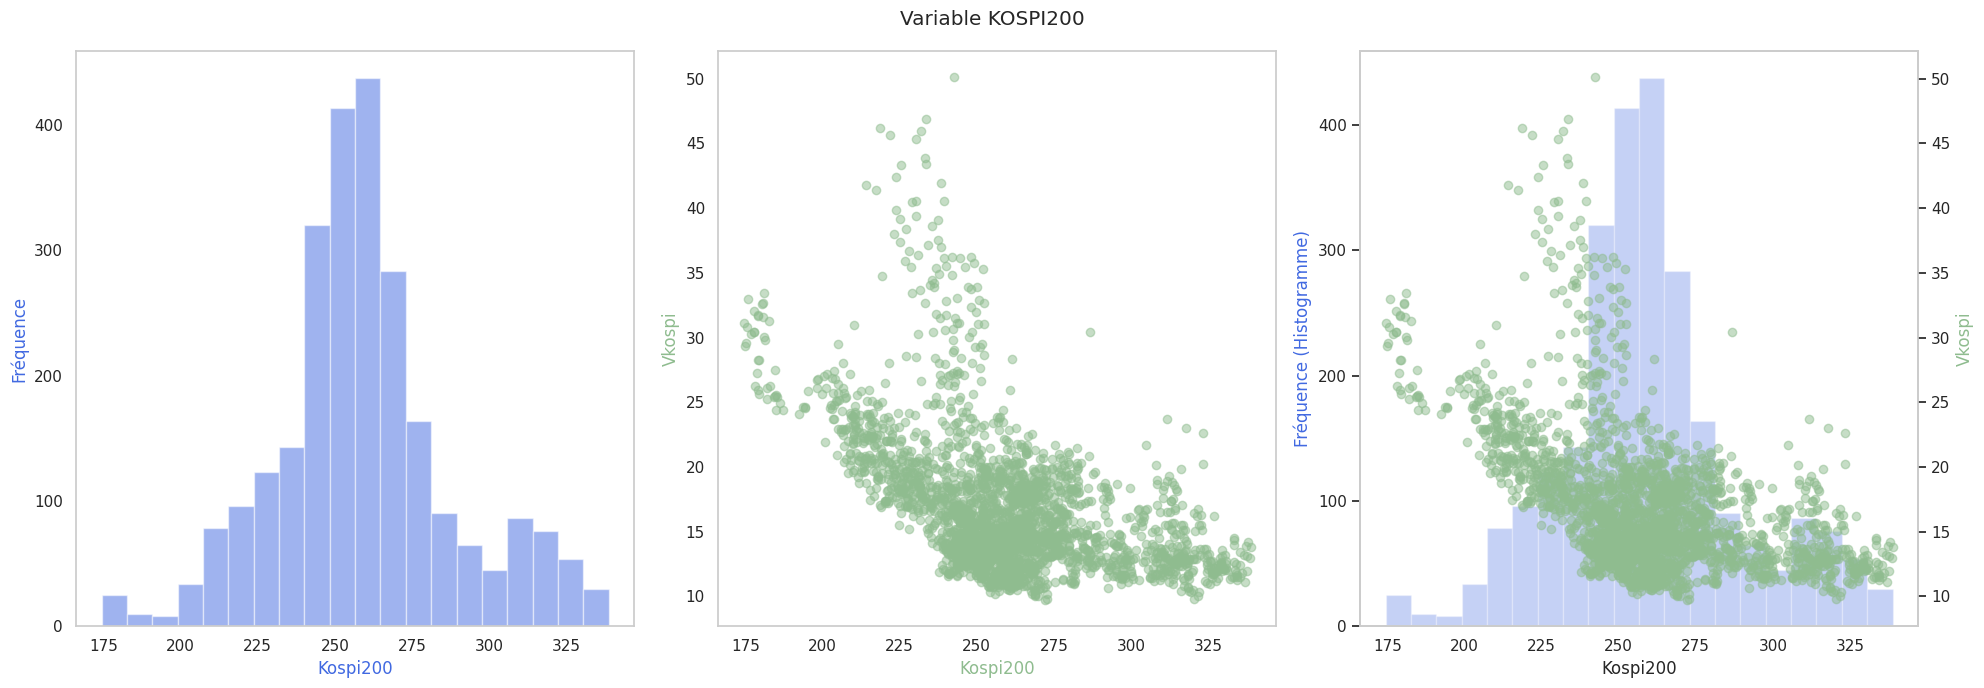

In [151]:
explore(data, 'KOSPI200', 'VKOSPI')

**/!\ Observation /!\**

On peut observer que la variable 'KOSPI200' n'a pas réellement de point sortant de la tendance. Donc aucune données ne sera supprimée

#####**Open_interest**

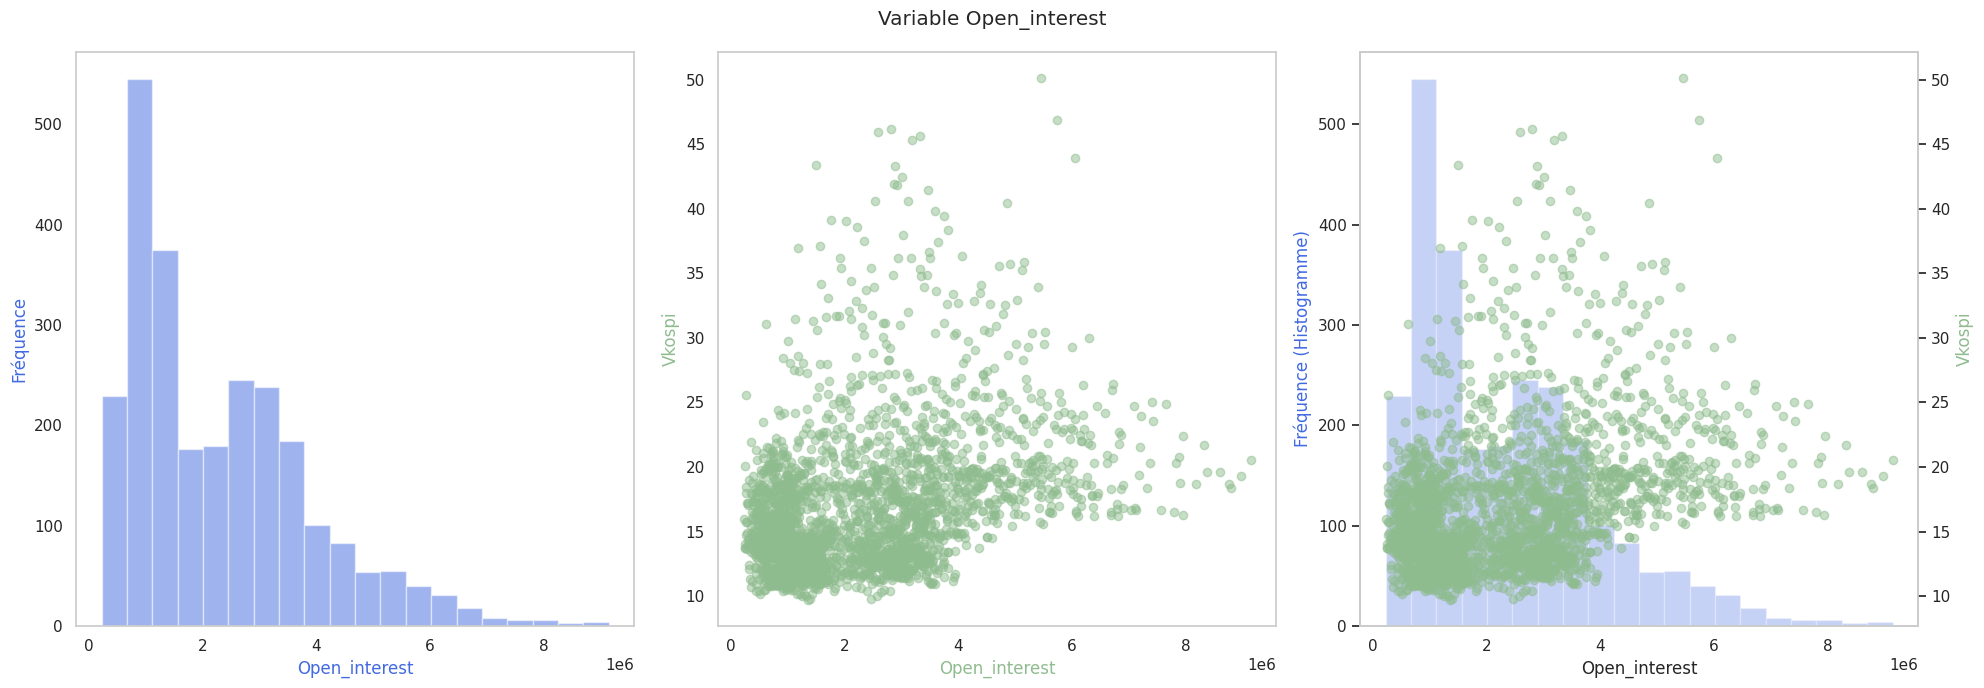

In [152]:
explore(data, 'Open_interest', 'VKOSPI')

**/!\ Observation /!\**

On peut observer que la variable 'Open_interest' a une tendance cohérentes avec les données réparties.

#####**For_KOSPI_Netbuying_Amount**

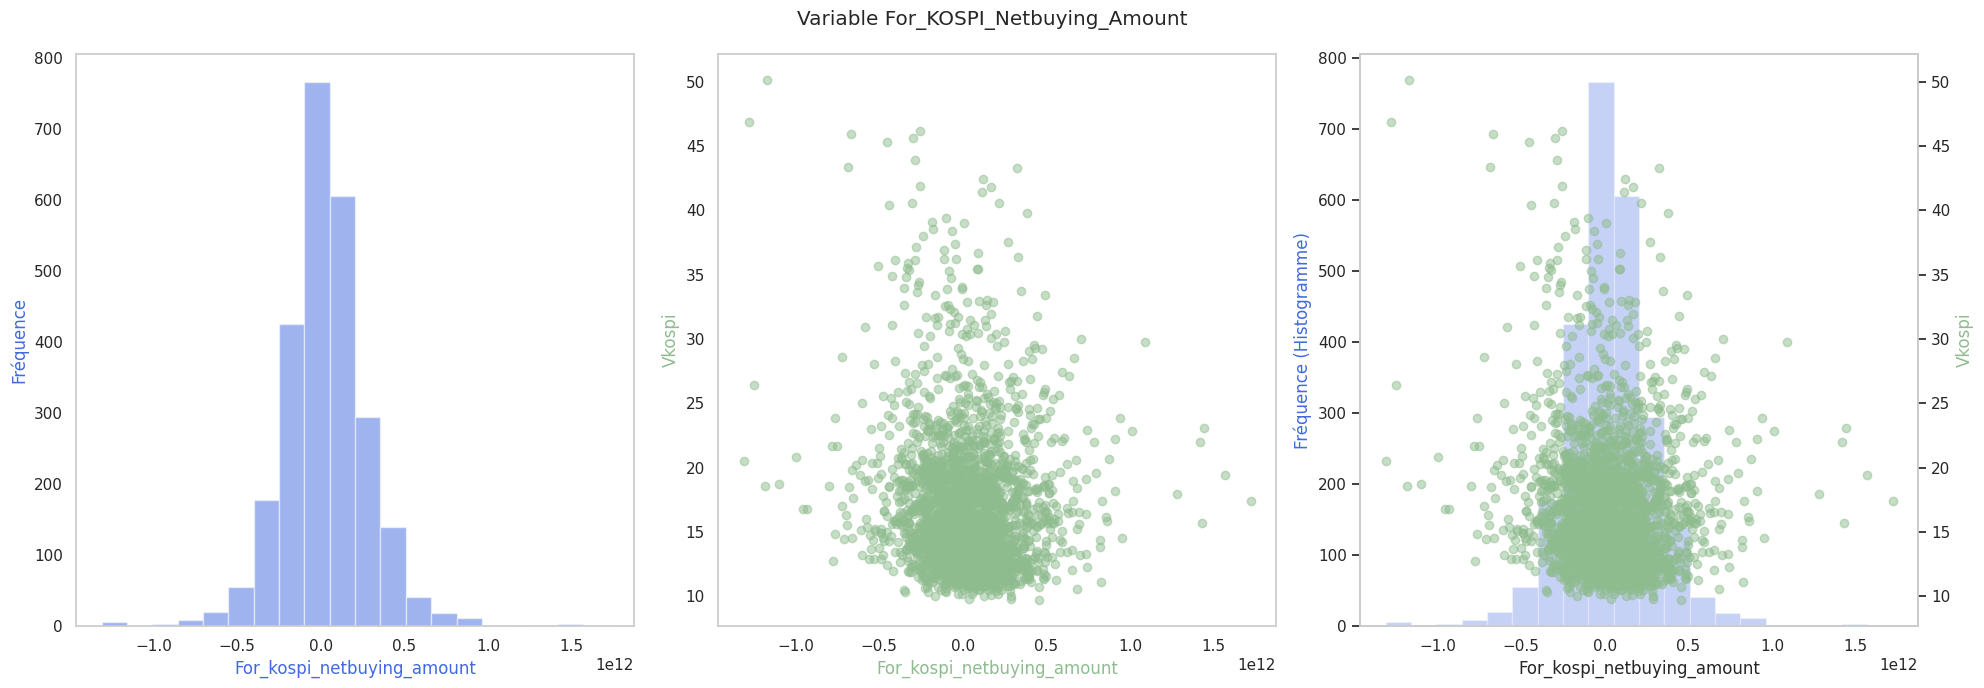

In [153]:
explore(data, 'For_KOSPI_Netbuying_Amount', 'VKOSPI')

**/!\ Observation /!\**

On voit que la majorité des données se concentrent aux alentours de l'intervalle [-0.5;0.5]*1e12 et par la suite, certaines données commencent à beaucoup s'éloigner de cette tendance. Pour avoir des données moins dispersé on va suprimer les données qui s'éloignent beaucoup.

In [154]:
delete = data.shape[0]
data = data.loc[(data['For_KOSPI_Netbuying_Amount'] >= -1e12) & (data['For_KOSPI_Netbuying_Amount'] <= 1.28e12)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 11


#####**For_Future_Netbuying_Quantity**

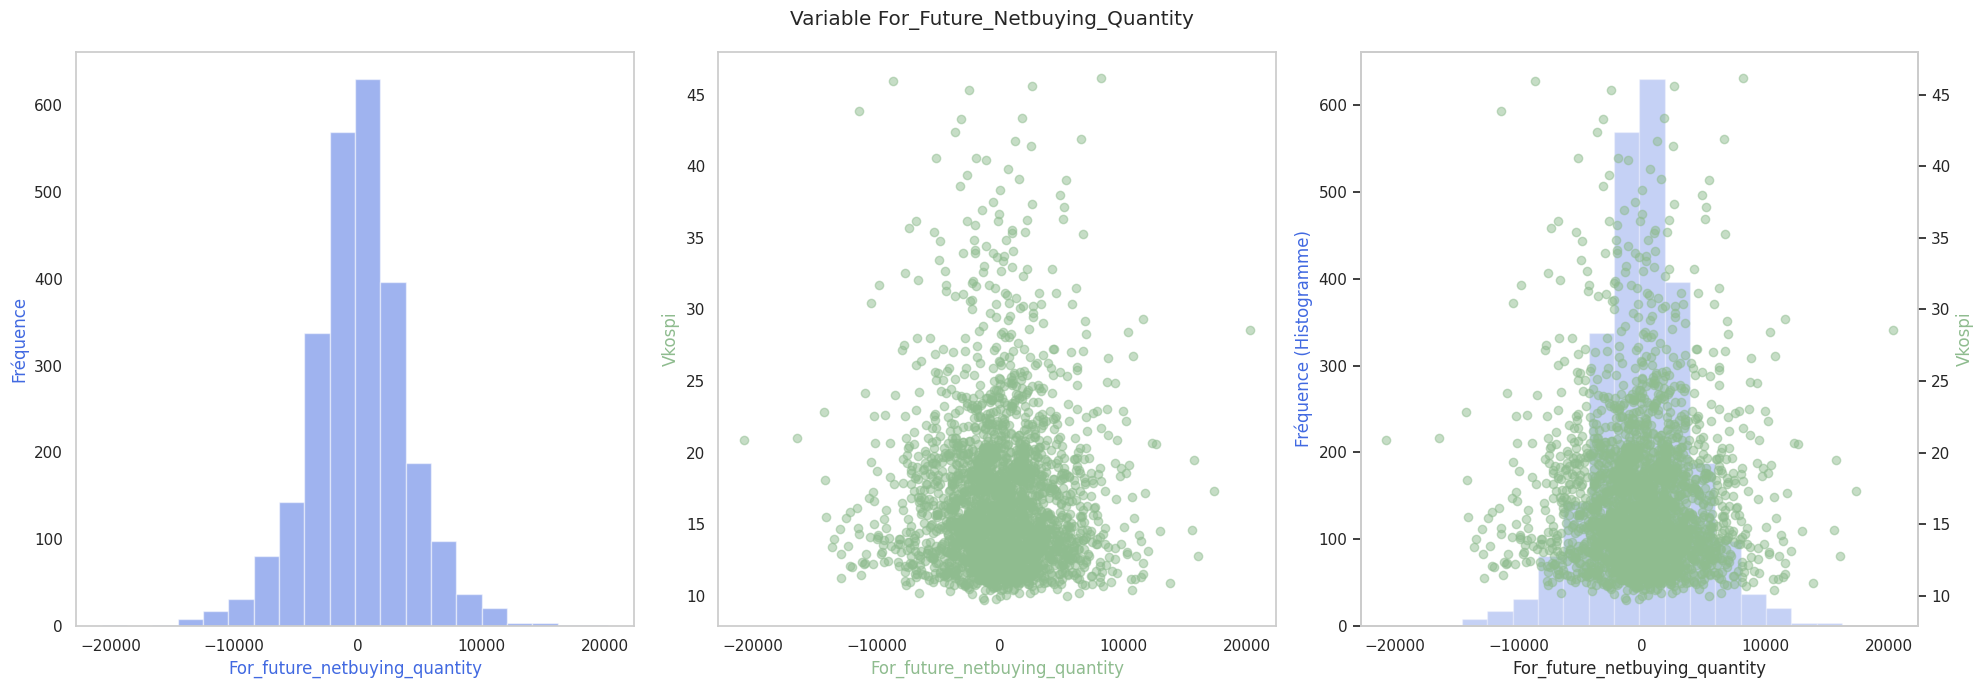

In [155]:
explore(data, 'For_Future_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

De même que dans le cas précédent, on a une concentration de données au centre, dans un intervalle aux alentours de [-10000;10000]. Dans le cas présent on supprimera que les deux points qui s'éloignent de tous les autres points.

In [156]:
delete = data.shape[0]
data = data.loc[(data['For_Future_Netbuying_Quantity'] >= -18000) & (data['For_Future_Netbuying_Quantity'] <= 20000)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 2


#####**For_Call_Netbuying_Quantity**

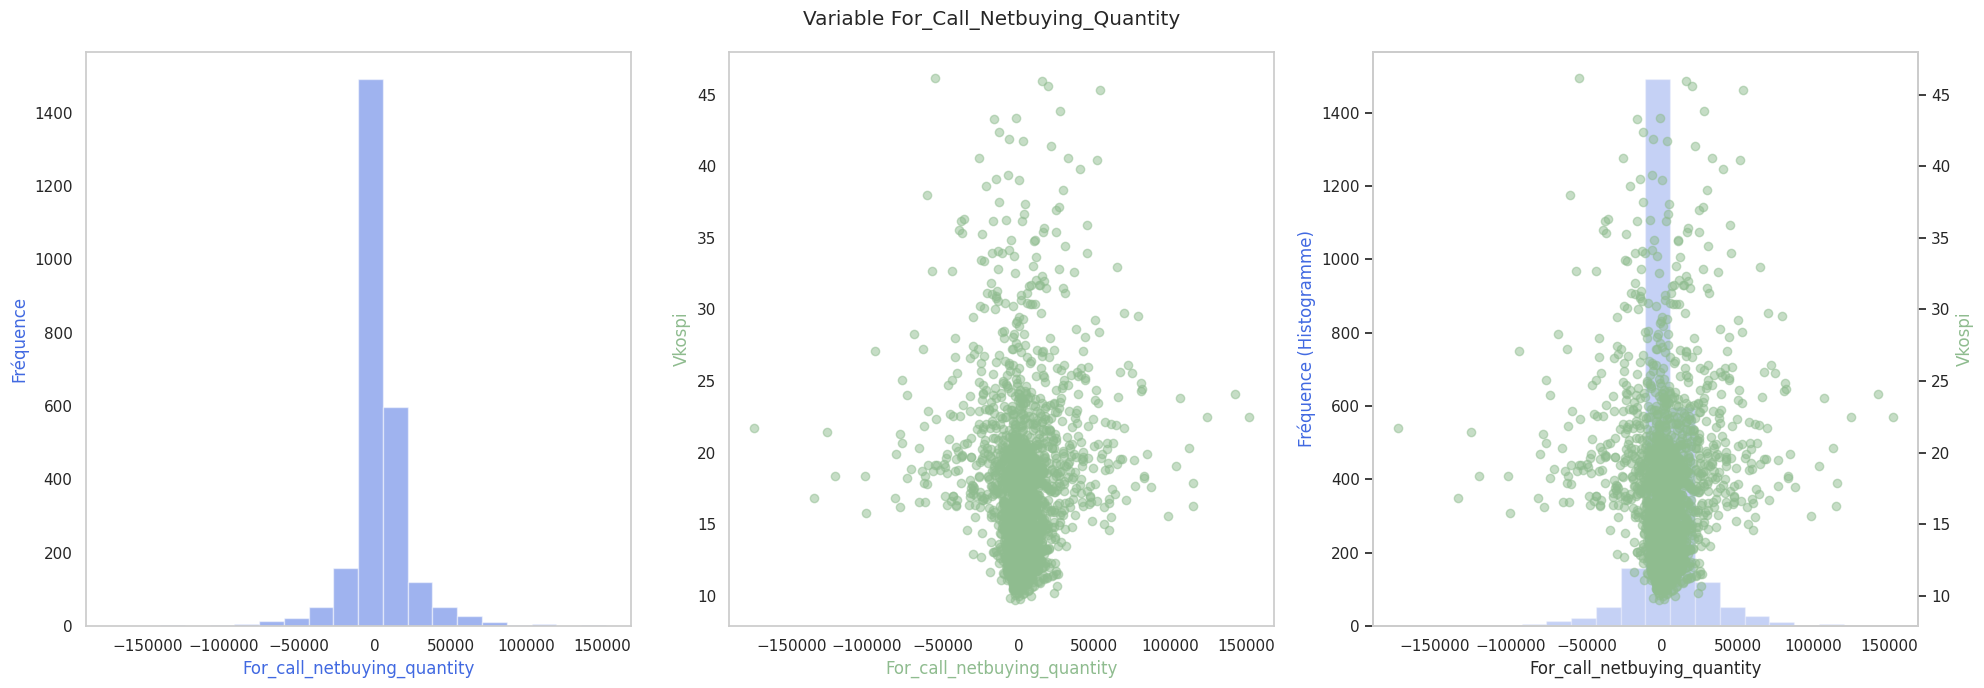

In [157]:
explore(data, 'For_Call_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

De même que dans les cas précédent, on a une concentration de données au centre, dans un intervalle aux alentours de [-25000;25000]. On supprimera ici les données qui s'éloignent beaucoup de la tendance.

In [158]:
delete = data.shape[0]
data = data.loc[(data['For_Call_Netbuying_Quantity'] >= -90000) & (data['For_Call_Netbuying_Quantity'] <= 98000)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 16


#####**For_Put_Netbuying_Quantity**

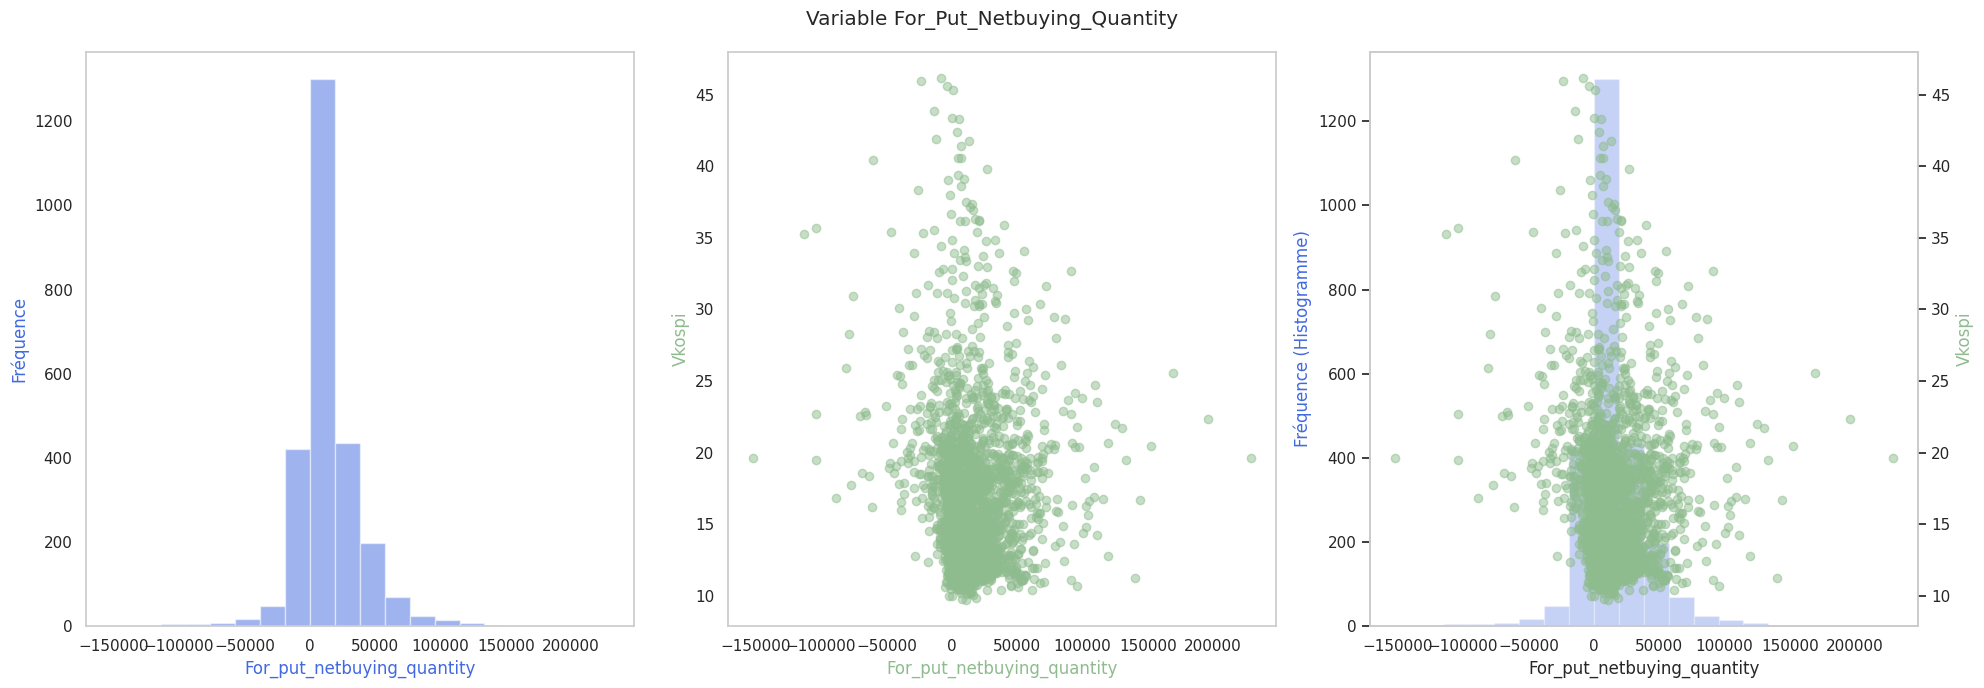

In [159]:
explore(data, 'For_Put_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

On a cette fois-ci une concentration principalement dans l'intervalle[-25000;25000] comme la répartition précédente. On observe une dispersion plus importante des données de part et d'autre, on essaiera de supprimer ceux qui s'éloignent réellement de la tendance afin d'éviter de supprimer un grand volume de données pouvant rendre le modèle trop simple.

In [160]:
delete = data.shape[0]
data = data.loc[(data['For_Put_Netbuying_Quantity'] >= -100000) & (data['For_Put_Netbuying_Quantity'] <= 150000)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 9


#####**Indiv_Future_Netbuying_Quantity**

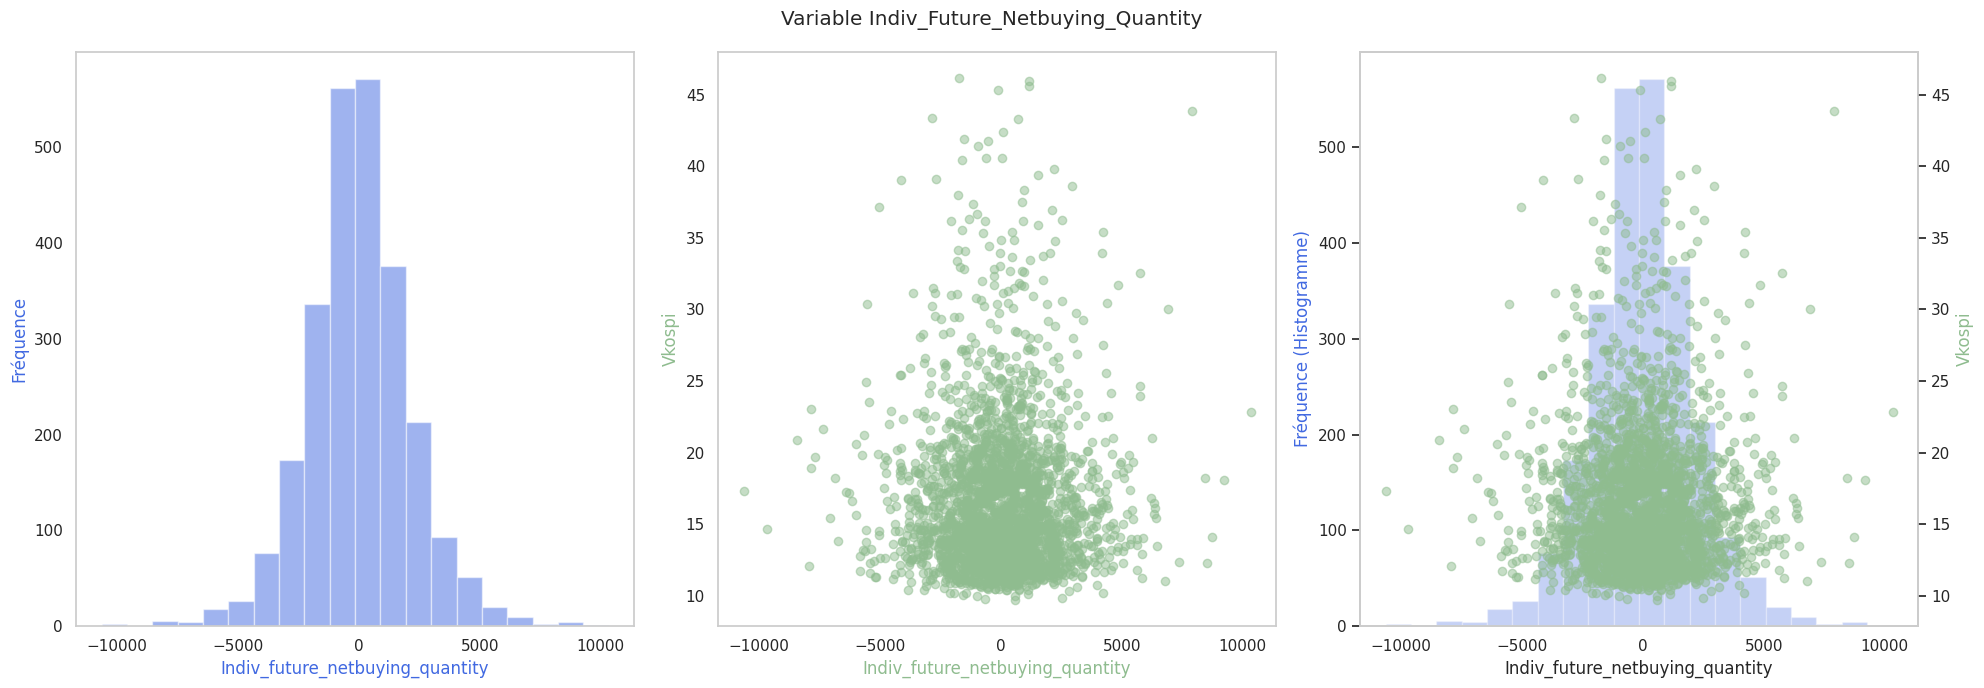

In [161]:
explore(data, 'Indiv_Future_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

Les données se concentrent dans l'intervalle[-5000;5000]. On observe également une dispersion plutôt importante des données de part et d'autre, on essaiera de supprimer ceux qui s'éloignent réellement de la tendance comme précédemment.

In [162]:
delete = data.shape[0]
data = data.loc[(data['Indiv_Future_Netbuying_Quantity'] >= -7500) & (data['Indiv_Future_Netbuying_Quantity'] <= 7900)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 13


#####**Indiv_Call_Netbuying_Quantity**

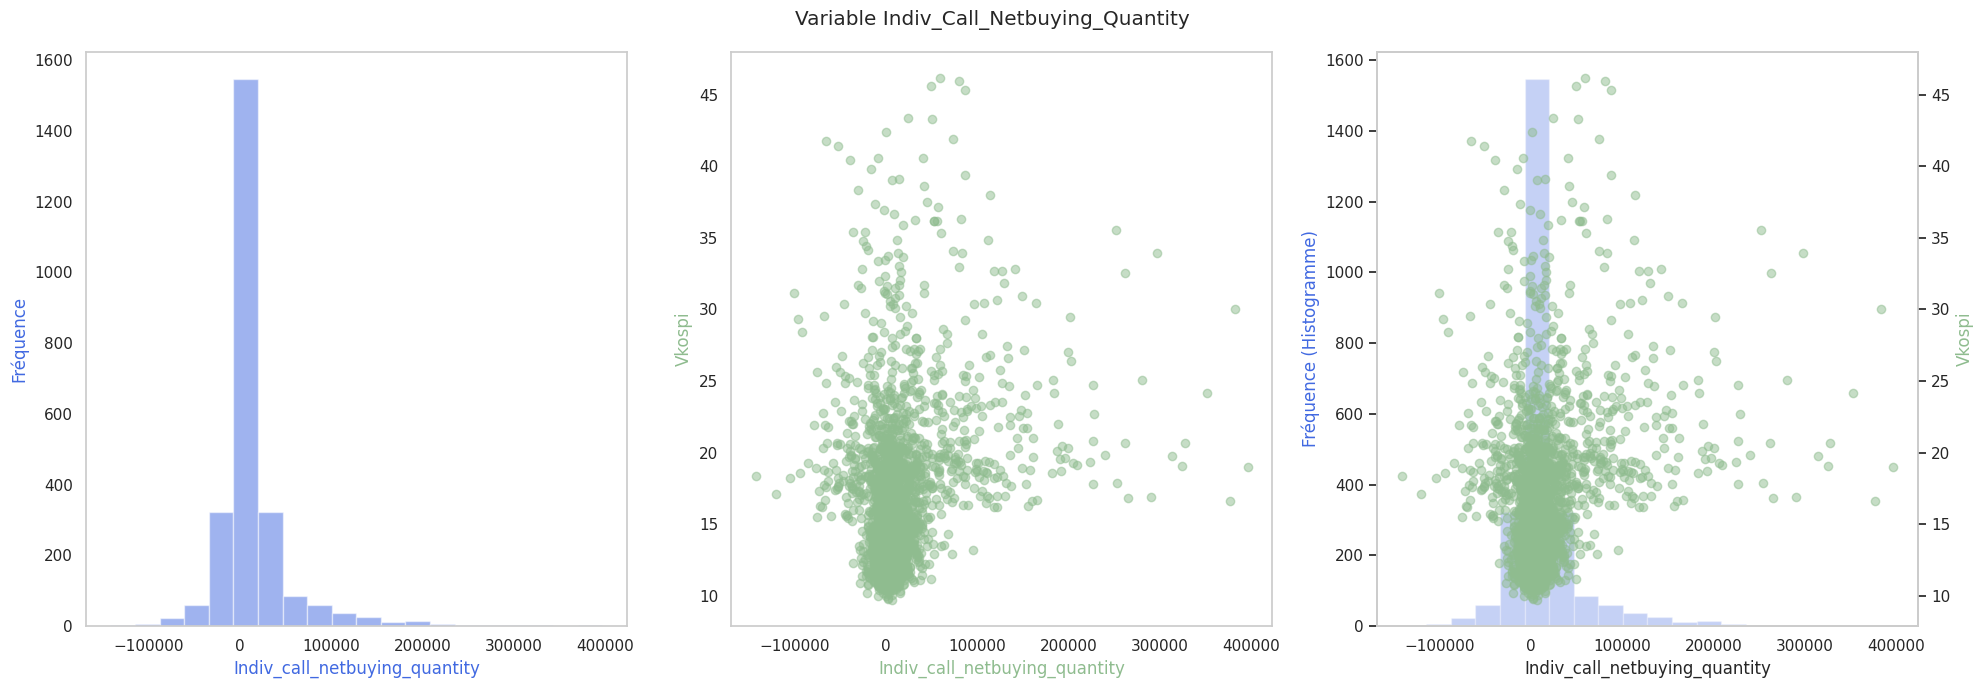

In [163]:
explore(data, 'Indiv_Call_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

Les données se concentrent dans l'intervalle[-50000;50000]. On remaque que le données s'étalent énorment dans un direction.  Ces données peuvent avoir une importance, c'est pourquoi on supprimera que les données les plus éloignés dans un premier temps.

In [164]:
delete = data.shape[0]
data = data.loc[(data['Indiv_Call_Netbuying_Quantity'] >= -101000) & (data['Indiv_Call_Netbuying_Quantity'] <= 270000)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 13


#####**Indiv_Put_Netbuying_Quantity**

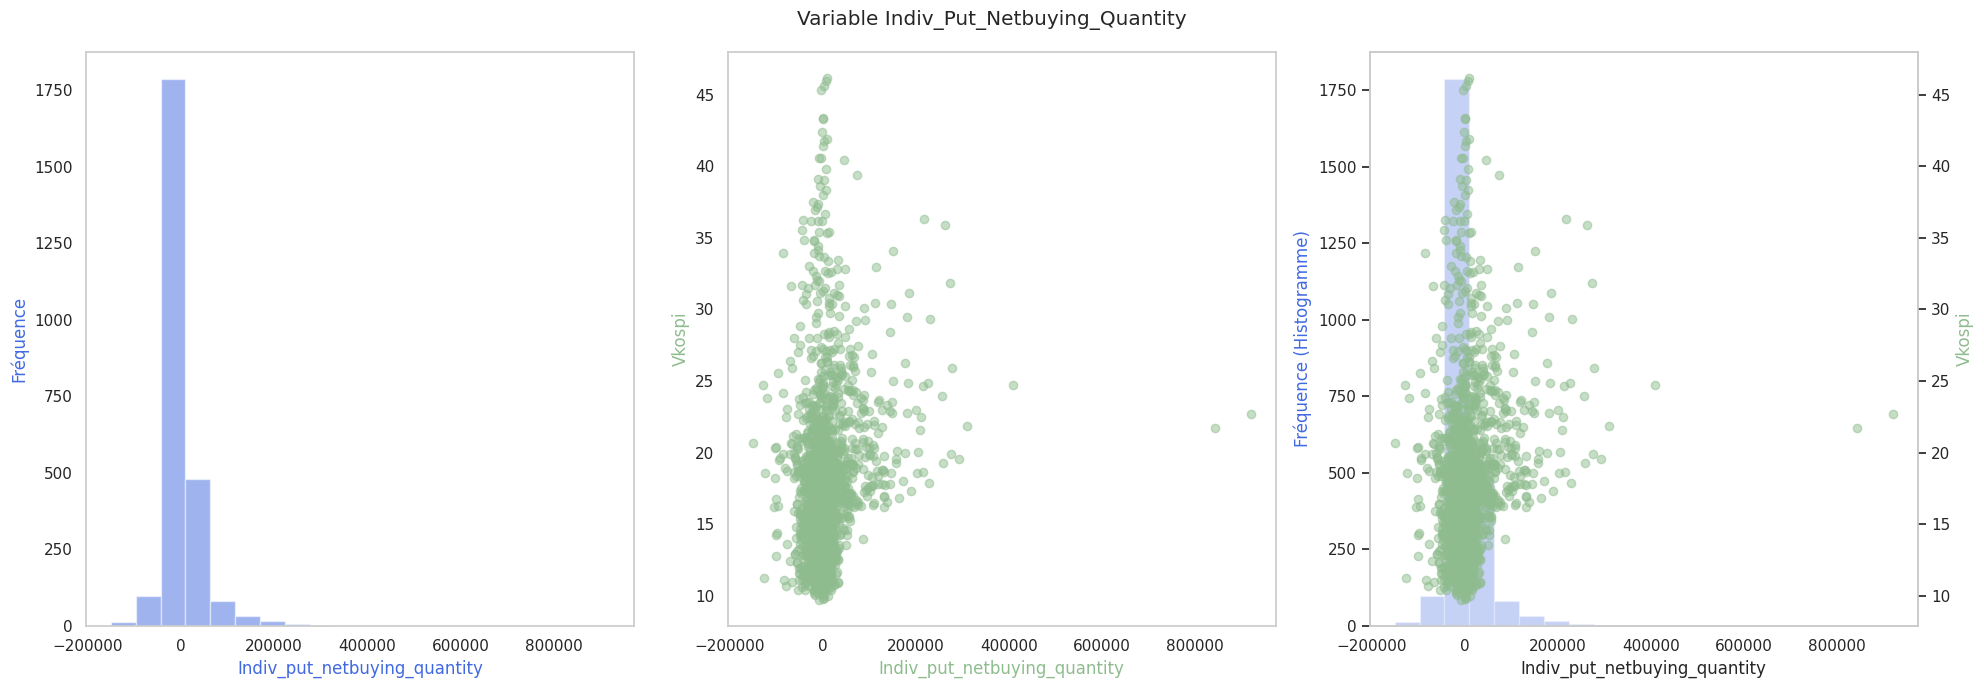

In [165]:
explore(data, 'Indiv_Put_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

Ici, la quasi totalité des données se concentrent aux mêmes intervalles [-100000,100000] à quelques exceptions près. En particulier 2 points qui se retrouvent isolés. On supprimera également le point le plus éloignés de la tendance et seul.

In [166]:
delete = data.shape[0]
data = data.loc[(data['Indiv_Put_Netbuying_Quantity'] <= 400000)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 3


#####**PCRatio**

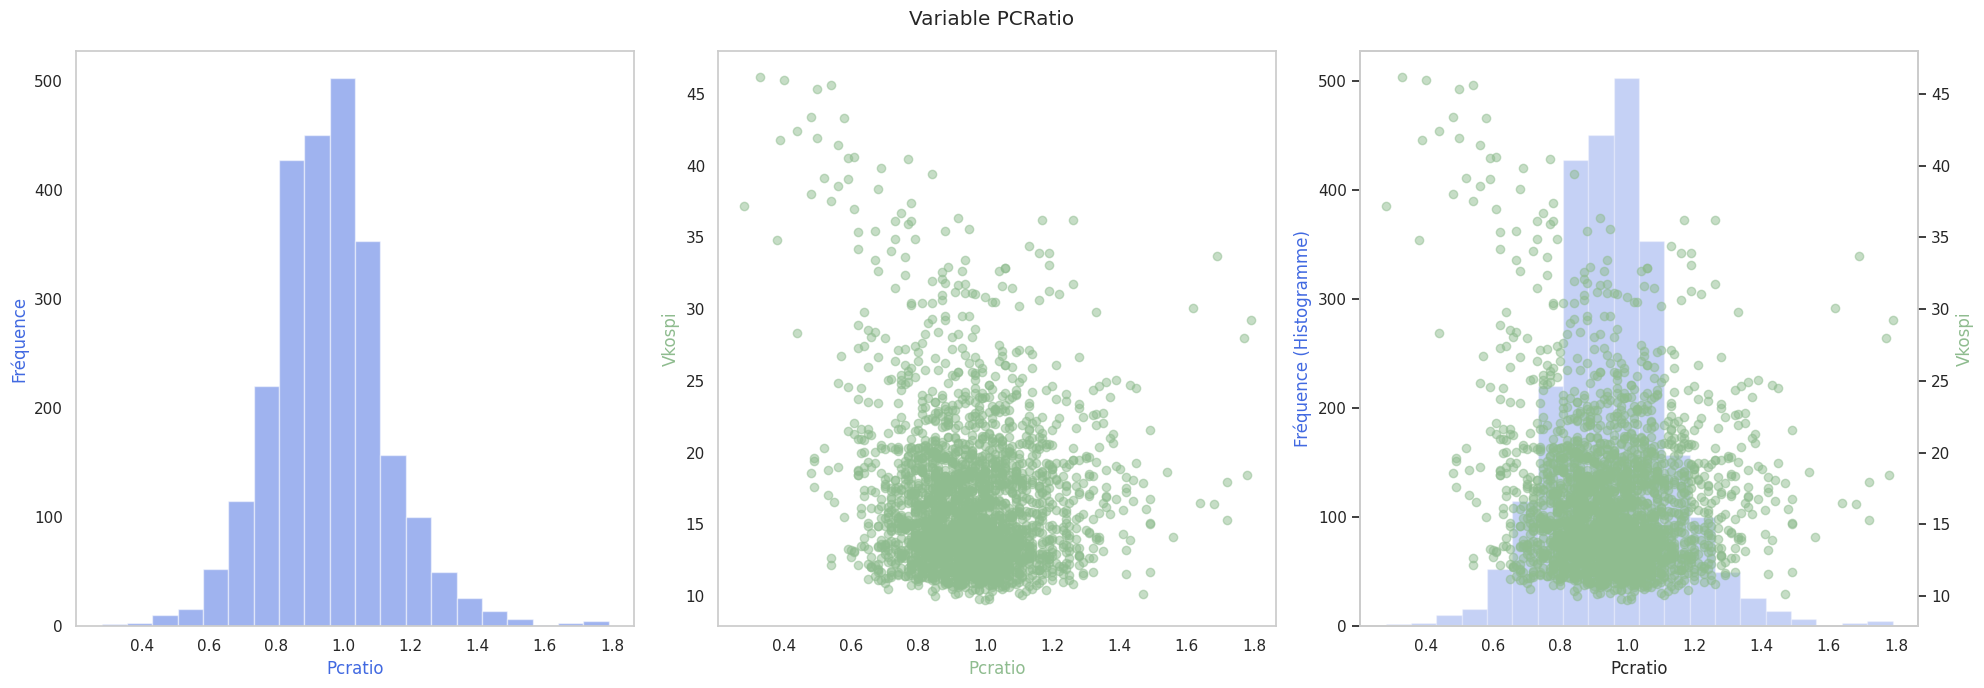

In [167]:
explore(data, 'PCRatio', 'VKOSPI')

**/!\ Observation /!\**

On se retrouve toujours dans un cas similaires des précédents. Ici étant un ration Call-Put nous allons laisser les données telles quelles.

#####**Conséquence**

Sur la quasi totalité de nos graphiques, on remarque une tendance sous forme de parabole qui peut se résumé à une tendance de la forme quadratique. Si nécessaire, nous ajouterons de nouvelles features pour avoir de meilleure performance par la suite.

In [171]:
print("Taille initiale : %d" % initial_size)
print("Taille finale : %d" % data.shape[0])
print("Delta : %d" % (initial_size-data.shape[0]))

Taille initiale : 2580
Taille finale : 2513
Delta : 67


Actuellement on a supprimé 67 données. Il faut savoir que ces données peuvent peut être s'avérer utilise lors du calcul de la performance et apporte une contribution significative. Elles peuvent appartenir à des tendances particulières. C'est pourquoi on doit garder de côtés cette éventuelle possibilité.

